In [1]:
import shap
import random
from sklearn.inspection import permutation_importance
import joblib
from pathlib import Path
import matplotlib.pyplot as plt


d:\Documents\University\ThirdYear\First Semester\Applied Analytical Models\VoltCity-Charging-Portal-MAIN\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
splits = joblib.load("../data/preprocessed_splits.pkl")

#Long Session
X_test_long_session = splits["Long Session"]["X_test"]
y_test_long_session = splits["Long Session"]["y_test"]

X_test_cost_regression = splits["Charging Cost (USD)"]["X_test"]
y_test_cost_regression = splits["Charging Cost (USD)"]["y_test"]

X_test_time_regression = splits["Charging Time Difference (minutes)"]["X_test"]
y_test_time_regression = splits["Charging Time Difference (minutes)"]["y_test"]

In [3]:
SampleOne_long_session = X_test_long_session.iloc[12:13]
SampleOne_cost_regression = X_test_cost_regression.iloc[12:13]
SampleOne_time_regression = X_test_time_regression.iloc[12:13]

In [4]:
display(SampleOne_time_regression, SampleOne_long_session, SampleOne_cost_regression)

,Battery Capacity (kWh),Charging Rate (kW),State of Charge (Start %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Vehicle Model_BMW i3,Vehicle Model_Chevy Bolt,Vehicle Model_Hyundai Kona,Vehicle Model_Nissan Leaf,Vehicle Model_Tesla Model 3,Charging Station Location_Chicago,Charging Station Location_Houston,Charging Station Location_Los Angeles,Charging Station Location_New York,Charging Station Location_San Francisco
7436,35.715572,25.682766,16.571328,240.174492,23.386437,6.0,0,1,False,False,False,True,False,False,True,False,False,False


,Battery Capacity (kWh),Time of Day,Day of Week,State of Charge (Start %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Vehicle Model_BMW i3,Vehicle Model_Chevy Bolt,Vehicle Model_Hyundai Kona,Vehicle Model_Nissan Leaf,Vehicle Model_Tesla Model 3,Charging Station Location_Chicago,Charging Station Location_Houston,Charging Station Location_Los Angeles,Charging Station Location_New York,Charging Station Location_San Francisco
7436,35.715572,3,0,16.571328,240.174492,23.386437,6.0,0,1,False,False,False,True,False,False,True,False,False,False


,Energy Consumed (kWh),Charging Rate (kW),Time of Day,Day of Week,Charger Type,User Type,Vehicle Model_BMW i3,Vehicle Model_Chevy Bolt,Vehicle Model_Hyundai Kona,Vehicle Model_Nissan Leaf,Vehicle Model_Tesla Model 3,Charging Station Location_Chicago,Charging Station Location_Houston,Charging Station Location_Los Angeles,Charging Station Location_New York,Charging Station Location_San Francisco
7436,70.360345,25.682766,3,0,0,1,False,False,False,True,False,False,True,False,False,False


In [5]:
long_session = joblib.load(r"..\saved_models\long_session.pkl")
cost_regression = joblib.load(r"..\saved_models\cost_regression.pkl")
time_regression = joblib.load(r"..\saved_models\time_regression.pkl")


## Classification

In [6]:
prediction = long_session.predict(SampleOne_long_session)[0]
props = long_session.predict_proba(SampleOne_long_session)

prediction_result = "Normal" if prediction == 1 else "Long Session"
prediction_result, props

('Normal', array([[7.352233e-04, 9.992648e-01]], dtype=float32))

## Shap

In [7]:
# Initialize the SHAP explainer
explainer_ls = shap.TreeExplainer(long_session)
explainer_tr = shap.TreeExplainer(time_regression)
explainer_cr = shap.TreeExplainer(cost_regression)

# Generate SHAP values
shap_values_sampleOne_ls = explainer_ls.shap_values(SampleOne_long_session)
shap_values_sampleOne_tr = explainer_tr.shap_values(SampleOne_time_regression)
shap_values_sampleOne_cr = explainer_cr.shap_values(SampleOne_cost_regression)

display(shap_values_sampleOne_ls, shap_values_sampleOne_ls.shape)
display(shap_values_sampleOne_tr, shap_values_sampleOne_tr.shape)
display(shap_values_sampleOne_cr, shap_values_sampleOne_cr.shape)

array([[ 3.2449300e+00,  4.4866089e-02, -4.0484261e-02,  2.6848149e-01,
         2.5822163e-01,  1.5748049e+00,  9.6514529e-01, -5.2644066e-03,
         1.0514521e-01,  2.9354594e-03,  1.7757712e-02,  2.8546944e-02,
         1.8088081e-01, -1.6095972e-02, -4.0173434e-02,  3.6545292e-02,
         3.8668480e-02, -4.2674888e-02,  5.9325392e-03]], dtype=float32)

(1, 19)

array([[ 5.8237906 , -7.562731  , 12.775127  ,  7.16634   ,  4.4018235 ,
        -4.829545  ,  0.06766061, -0.22058097, -0.166216  , -1.6289055 ,
         0.6440488 , -5.8245425 ,  0.38577038,  1.6000015 ,  4.266983  ,
         1.1209065 , -0.23743106,  0.2780958 ]], dtype=float32)

(1, 18)

array([[ 9.7806730e+00, -6.1650202e-03,  3.6902118e-03,  1.9907756e-03,
         7.6824460e+00, -2.1000465e-03,  3.9659103e-04, -2.5326124e-04,
         2.5852387e-05,  1.1283235e-02, -1.8411867e-04, -4.1122743e-04,
         2.2323758e-04, -4.9611938e-04, -9.1436785e-04, -1.5418221e-03]],
      dtype=float32)

(1, 16)

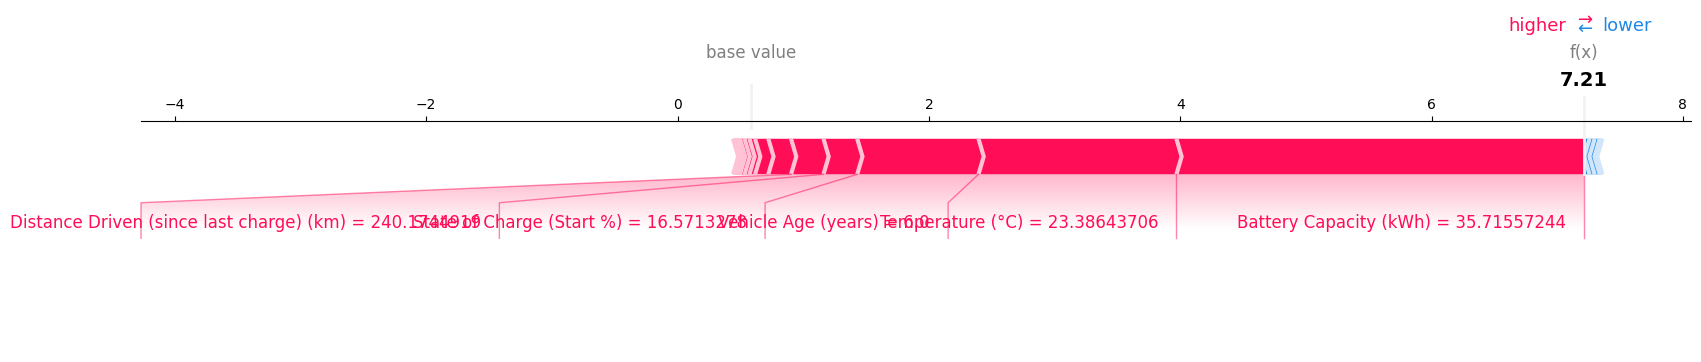

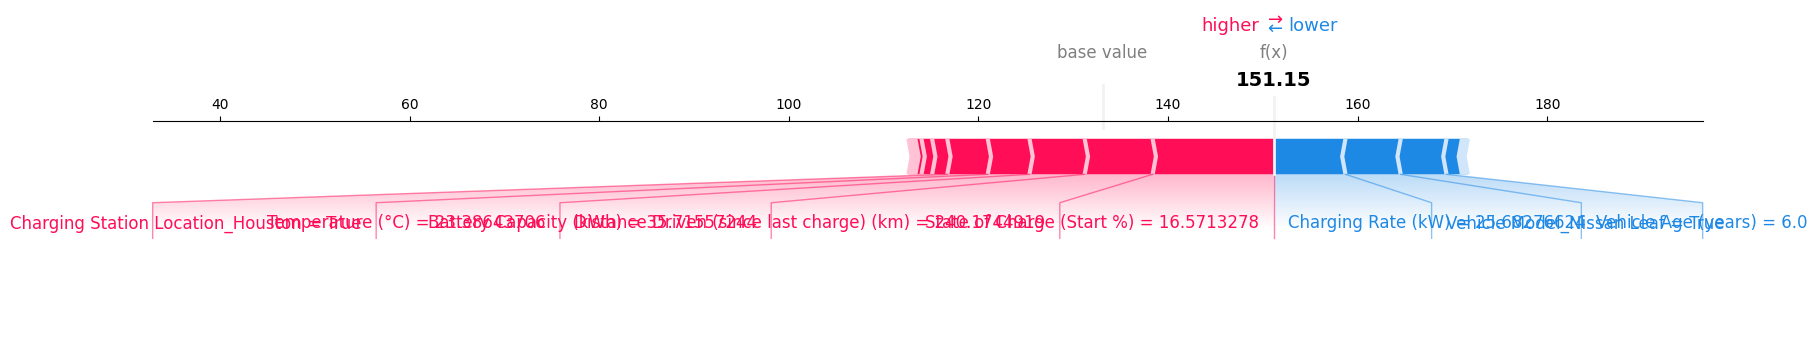

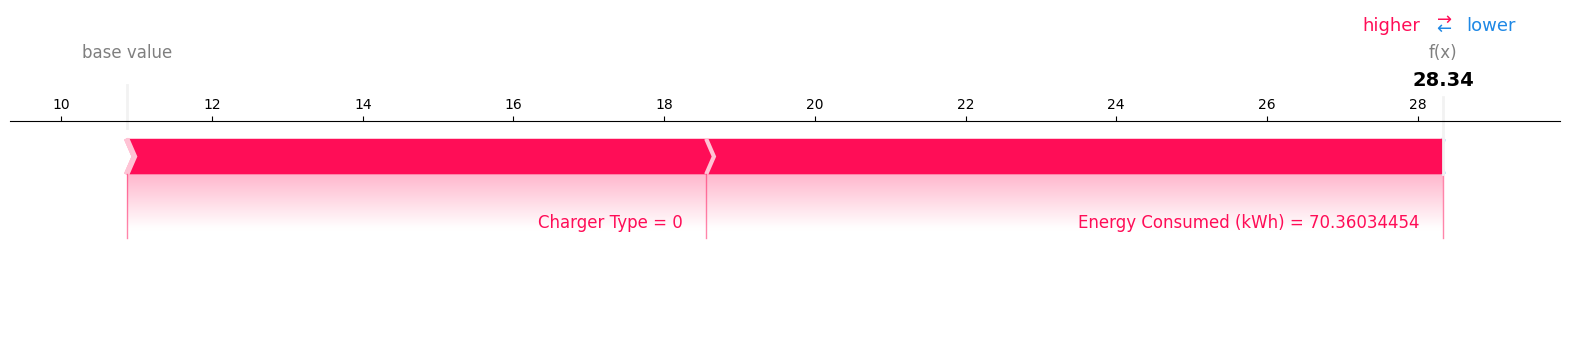

In [ ]:
#Long Session
shap.plots.force(
    base_value=explainer_ls.expected_value,      # just the scalar
    shap_values=shap_values_sampleOne_ls,        # already 1D
    features=SampleOne_long_session.values[0],
    feature_names=X_test_long_session.columns,
    matplotlib=True
)
#Time Regression
shap.plots.force(
    base_value=explainer_tr.expected_value,      # just the scalar
    shap_values=shap_values_sampleOne_tr,        # already 1D
    features=SampleOne_time_regression.values[0],
    feature_names=X_test_time_regression.columns,
    matplotlib=True
)

#Cost Regression
shap.plots.force(
    base_value=explainer_cr.expected_value,      # just the scalar
    shap_values=shap_values_sampleOne_cr,        # already 1D
    features=SampleOne_cost_regression.values[0],
    feature_names=X_test_cost_regression.columns,
    matplotlib=True,
)



In [9]:
joblib.dump(explainer_ls, '../explainers/shap/Long_Session_Explainer.pkl')
joblib.dump(explainer_cr, '../explainers/shap/Cost_Regression_Explainer.pkl')
joblib.dump(explainer_tr, '../explainers/shap/Time_Regression_Explainer.pkl')

['../explainers/shap/Time_Regression_Explainer.pkl']